In [508]:
# Import the necessary libraries 
import numpy as np   # Provides single and multi-dimensional arrays
import pandas as pd  # Provides DataFrames for easy data manipulations and statstical functions
import matplotlib.pyplot as plt  # Provides several functions for plotting various graphs
% matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [509]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [510]:
# Read vehicle data into a dataframe
orig_vehicle_df = pd.read_csv('vehicle-1.csv')
orig_vehicle_df.shape

# All the rows & features from data file are read into the dataframe

(846, 19)

In [511]:
# Make a copy of the original data so we dont have to load data again if we need to rollback our changes later
vehicle_df = orig_vehicle_df
vehicle_df.shape

# All the rows & features from original dataframe are copied into campaign_df 

(846, 19)

##### Exploratory Data Analysis

In [512]:
# Get more info on the datatypes of the columns 
vehicle_df.info()

# There are 846 rows and 19 columns
# All of them are numeric columns except 'class' which is a string column
# Class is the target variable. Should be removed when PCA is done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [513]:
vehicle_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [514]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [515]:
# Check for duplicate data

dups = vehicle_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

vehicle_df[dups]

# To check for duplicates by column
#pd.concat(g for _, g in vehicle_df.groupby("col_name") if len(g) > 1).count()

# Remove duplicate rows

#print('Number of rows before discarding duplicates = %d' % (vehicle_df.shape[0]))
#vehicle_df.drop_duplicates(subset = None, keep = 'first', inplace=True)
#print('Number of rows after discarding duplicates = %d' % (vehicle_df.shape[0]))

Number of duplicate rows = 0


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

##### Target Variable Analysis

In [516]:
# Lets look at the target column - 'class'
vehicle_df.groupby('class')['class'].count()

# There are only three types in class column with 'car' having the most occurences
# The ratio of bus:car:van = 0.257 : 0.507 : 0.235
# No missing values
# Use LabelEncoder to change labels to numeric values before proceeding with further analysis

class
bus    218
car    429
van    199
Name: class, dtype: int64

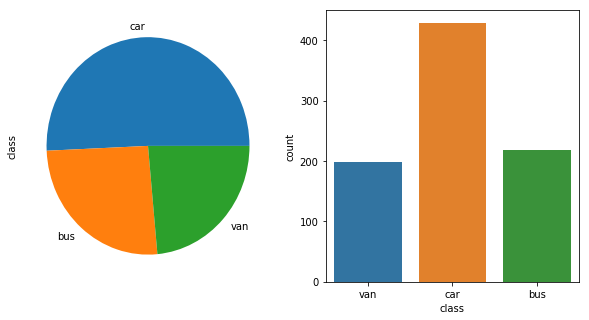

In [517]:
# class - Categorical
plt.figure(1, figsize=(10,5))
plt.subplot(121)
vehicle_df['class'].value_counts().plot(kind='pie')
plt.subplot(122)
sns.countplot(vehicle_df['class'])

In [518]:
# Encode class variable to numeric labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
vehicle_df['class'] = le.fit_transform(vehicle_df['class'])

In [519]:
vehicle_df.head()

# class column has been encoded to numeric values 
#bus=0
#car=1
#van=2

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [520]:
# Create seperate dataframes for each class of vehicles for further comparison
# Bus
bus_df = vehicle_df[vehicle_df['class'] == 0]

# Car
car_df = vehicle_df[vehicle_df['class'] == 1]

# Van
van_df = vehicle_df[vehicle_df['class'] == 2]

##### Missing Values Imputation

In [521]:
# Check for missing values
vehicle_df.isnull().sum()

# There are some missing values in several columns as indicated below

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [522]:
# Function for filling in missing values
def impute_missing_vals(df):
    for col in df.columns:
        print('Imputing missing values for column:', col)
    
        # Get median value for a given col and class of vehicle
        bus_med_val = bus_df[col].median()
        car_med_val = car_df[col].median()
        van_med_val = van_df[col].median()
        print('Bus:', bus_med_val)          
        print('Car:', car_med_val)
        print('Van:', van_med_val)
    
        # Fill missing value with the median of that col for that class of vehicles   
        df.loc[(pd.isna(df[col])) & (df['class']==0), col] = bus_med_val
        df.loc[(pd.isna(df[col])) & (df['class']==1), col] = car_med_val
        df.loc[(pd.isna(df[col])) & (df['class']==2), col] = van_med_val

In [523]:
# Impute missing value with the median of that col for that class of vehicles
impute_missing_vals(vehicle_df)

Imputing missing values for column: compactness
Bus: 89.0
Car: 97.0
Van: 90.0
Imputing missing values for column: circularity
Bus: 44.0
Car: 46.0
Van: 42.0
Imputing missing values for column: distance_circularity
Bus: 72.0
Car: 94.0
Van: 75.0
Imputing missing values for column: radius_ratio
Bus: 167.5
Car: 186.0
Van: 144.0
Imputing missing values for column: pr.axis_aspect_ratio
Bus: 64.0
Car: 61.0
Van: 59.0
Imputing missing values for column: max.length_aspect_ratio
Bus: 6.0
Car: 9.0
Van: 9.0
Imputing missing values for column: scatter_ratio
Bus: 152.0
Car: 185.0
Van: 142.0
Imputing missing values for column: elongatedness
Bus: 44.0
Car: 36.0
Van: 47.0
Imputing missing values for column: pr.axis_rectangularity
Bus: 19.0
Car: 22.0
Van: 18.0
Imputing missing values for column: max.length_rectangularity
Bus: 145.0
Car: 150.0
Van: 145.0
Imputing missing values for column: scaled_variance
Bus: 177.0
Car: 206.0
Van: 164.0
Imputing missing values for column: scaled_variance.1
Bus: 344.0
Car:

In [524]:
vehicle_df.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0          95.0         48.0                  83.0         178.0   
1          91.0         41.0                  84.0         141.0   
2         104.0         50.0                 106.0         209.0   
3          93.0         41.0                  82.0         159.0   
4          85.0         44.0                  70.0         205.0   
5         107.0         44.0                 106.0         172.0   
6          97.0         43.0                  73.0         173.0   
7          90.0         43.0                  66.0         157.0   
8          86.0         34.0                  62.0         140.0   
9          93.0         44.0                  98.0         186.0   
10         86.0         36.0                  70.0         143.0   
11         90.0         34.0                  66.0         136.0   
12         88.0         46.0                  74.0         171.0   
13         89.0         42.0                  85.0         144.0   
14         94.0         49.0                  79.0         203.0   
15         96.0         55.0                 103.0         201.0   
16         89.0         36.0                  51.0         109.0   
17         99.0         41.0                  77.0         197.0   
18        104.0         54.0                 100.0         186.0   
19        101.0         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                     10.0          162.0   
1                   57.0                      9.0          149.0   
2                   66.0                     10.0          207.0   
3                   63.0                      9.0          144.0   
4                  103.0                     52.0          149.0   
5                   50.0                      6.0          255.0   
6                   65.0                      6.0          153.0   
7                   65.0                      9.0          137.0   
8                   61.0                      7.0          122.0   
9                   62.0                     11.0          183.0   
10                  61.0                      9.0          133.0   
11                  55.0                      6.0          123.0   
12                  68.0                      6.0          152.0   
13                  58.0                     10.0          152.0   
14                  71.0                      5.0          174.0   
15                  65.0                      9.0          204.0   
16                  52.0                      6.0          118.0   
17                  69.0                      6.0          177.0   
18                  61.0                     10.0          216.0   
19                  61.0                     10.0          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                      159.0   
1            45.0                    19.0                      143.0   
2            32.0                    23.0                      158.0   
3            46.0                    19.0                      143.0   
4            45.0                    19.0                      144.0   
5            26.0                    28.0                      169.0   
6            42.0                    19.0                      143.0   
7            48.0                    18.0                      146.0   
8            54.0                    17.0                      127.0   
9            36.0                    22.0                      146.0   
10           50.0                    18.0                      130.0   
11           54.0                    17.0                      118.0   
12           43.0                    19.0                      148.0   
13           44.0                    19.0                      144.0   
14           37.0                    21.0                      154

In [525]:
# Check for missing values
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

##### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FED8185828>,
      dtype=object)

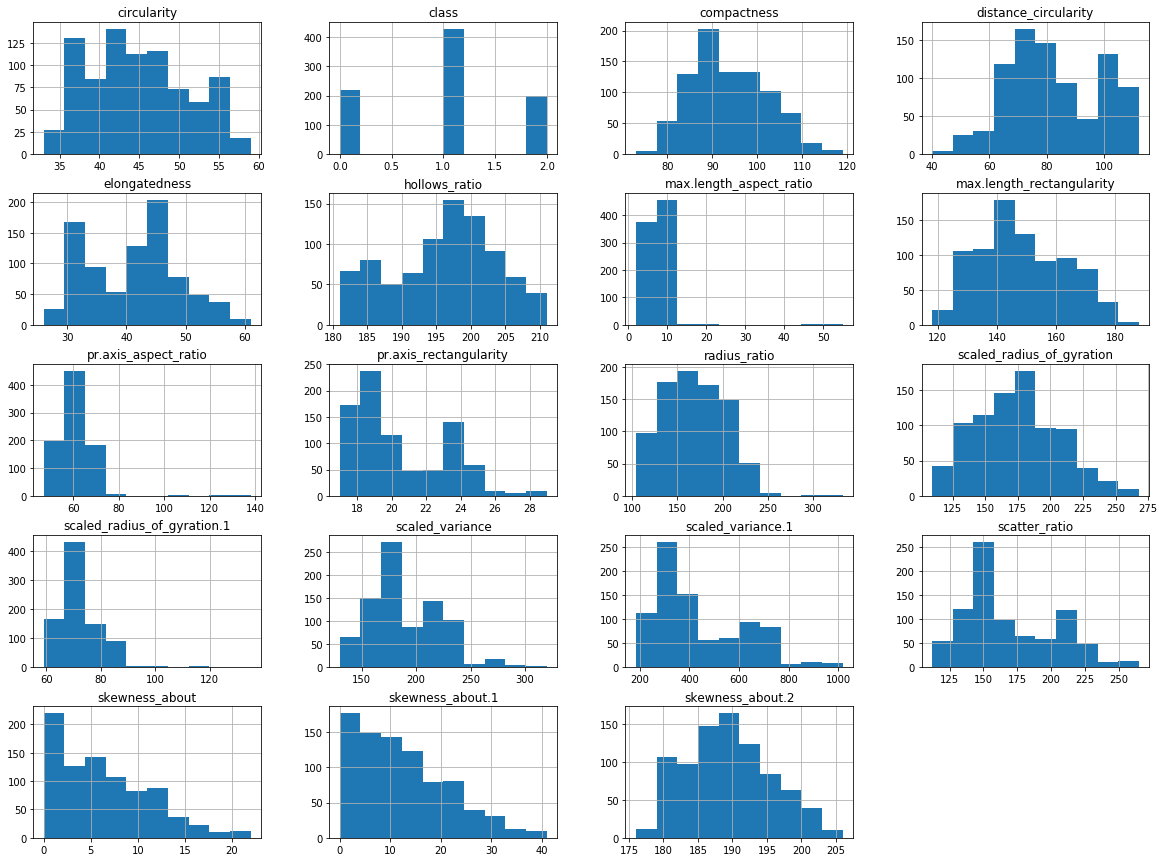

In [526]:
# Distributions for each of the numeric columns
vehicle_df.hist(figsize=(20,15))

# Columns with almost normal distributions - circularity, compactness, hollows ratio, max length rectangularity, radius ratio, scaled_radius_of_gyration, skewness_about.2
# Columns with right skew, indicating possible presence of outliers - pr.axis_rectangularity, pr.axis_aspect_ratio, scaled_radius_of_gyration.1, radius_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1
# Columns with left skew - distance_circularity

In [527]:
# Define function to identify outliers given the dataframe and col
def identify_outliers(df, col):
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = Q3-Q1
    print('Column:', col)
    print('IQR:', IQR)
    print('Lower Limit -', Q1 - 1.5*IQR)
    print('Upper Limit -', Q3 + 1.5*IQR)
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    
    return outliers

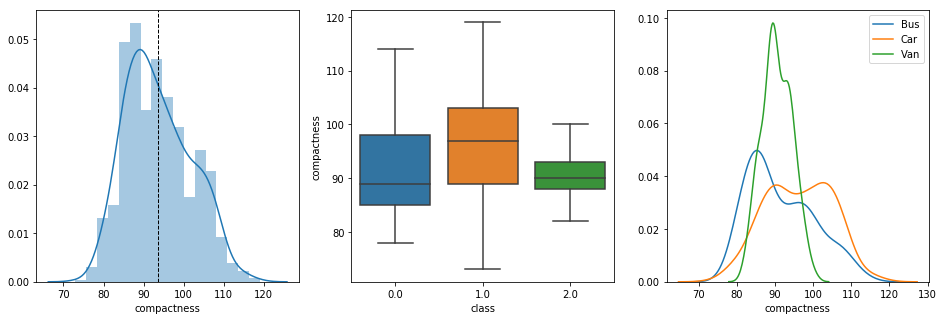

In [528]:
# compactness - Numerical/Continuous
plt.figure(1, figsize=(16,5))
plt.subplot(131)
sns.distplot(vehicle_df['compactness'])
plt.axvline(vehicle_df['compactness'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(132)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['compactness'], orient='vert')
plt.subplot(133)
# Look at the Probability Density Function
sns.distplot(bus_df['compactness'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['compactness'], kde=True, hist=False, label='Car')
sns.distplot(van_df['compactness'], kde=True, hist=False, label='Van')

# Distribution is normal.
# The medians for compactness is higher than vans and bus, which are almost same.
# There are no outliers
# There is high probability that if the vehicle compactness is between 80 - 100, the vehicle is a van.

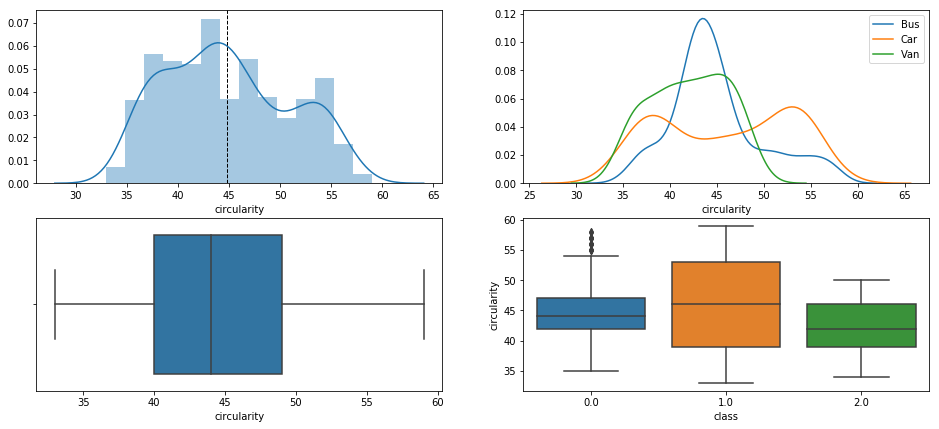

In [529]:
# circularity - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['circularity'])
plt.axvline(vehicle_df['circularity'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['circularity'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['circularity'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['circularity'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['circularity'], kde=True, hist=False, label='Car')
sns.distplot(van_df['circularity'], kde=True, hist=False, label='Van')

# Distribution is normal.
# There are no outliers in the whole column but we see some outliers in the 'bus' category of vehicles.
# Cars are more circular, followed by bus and then van.

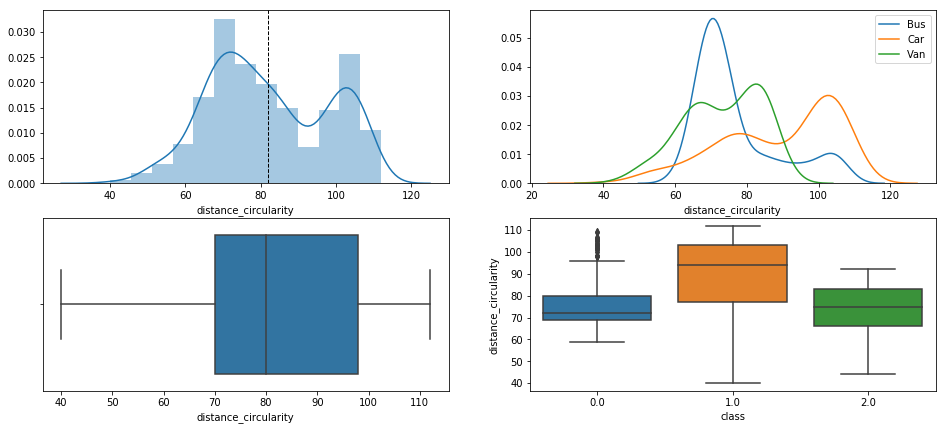

In [530]:
# distance_circularity - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['distance_circularity'])
plt.axvline(vehicle_df['distance_circularity'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['distance_circularity'], orient='v')
plt.subplot(223)
sns.boxplot(vehicle_df['distance_circularity'], orient='h')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['distance_circularity'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['distance_circularity'], kde=True, hist=False, label='Car')
sns.distplot(van_df['distance_circularity'], kde=True, hist=False, label='Van')

# Distribution has two gaussians, with peaks at 70 and 105.
# Also 2 gaussian when density is plotted indicating that 2 clusters of vehicles may be present in each class
# There are no outliers in the whole column, but we see outliers in the 'bus' category of vehicles.
# The median for car is much higher than van or bus.
# The density plots are overlapping for each vehicle type, indicating that this column may not be of much help in segregating the vehicles

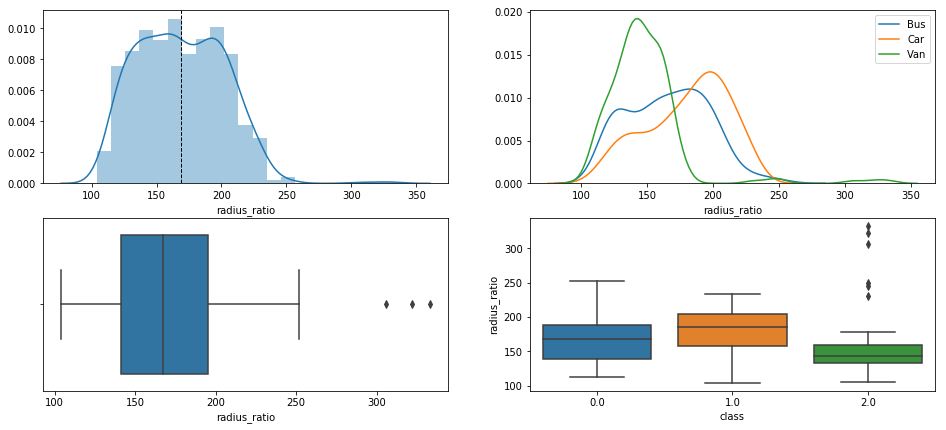

In [531]:
# radius_ratio - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['radius_ratio'])
plt.axvline(vehicle_df['radius_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['radius_ratio'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['radius_ratio'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['radius_ratio'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['radius_ratio'], kde=True, hist=False, label='Car')
sns.distplot(van_df['radius_ratio'], kde=True, hist=False, label='Van')

# Distribution is mostly normal with two gaussians, mean at ~170.
# There are outliers in the 'van' category of vehicles.
# The radius_ratio median for car is high, followed by bus and then van.
# The density plots are overlapping for each vehicle type

In [532]:
# Identify outliers
outliers = identify_outliers(vehicle_df, 'radius_ratio')
outliers

# The values which are identified as outliers are natural. Hence no need to remove them.

Column: radius_ratio
IQR: 54.0
Lower Limit - 60.0
Upper Limit - 276.0


compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         306.0   
135         89.0         47.0                  83.0         322.0   
388         94.0         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                     49.0          153.0   
135                 133.0                     48.0          158.0   
388                 138.0                     49.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    2.0  
135             184.0          194.0    2.0  
388             188.0          196.0    2.0

Column axis_aspect_ratio skew: 3.8335302107950406


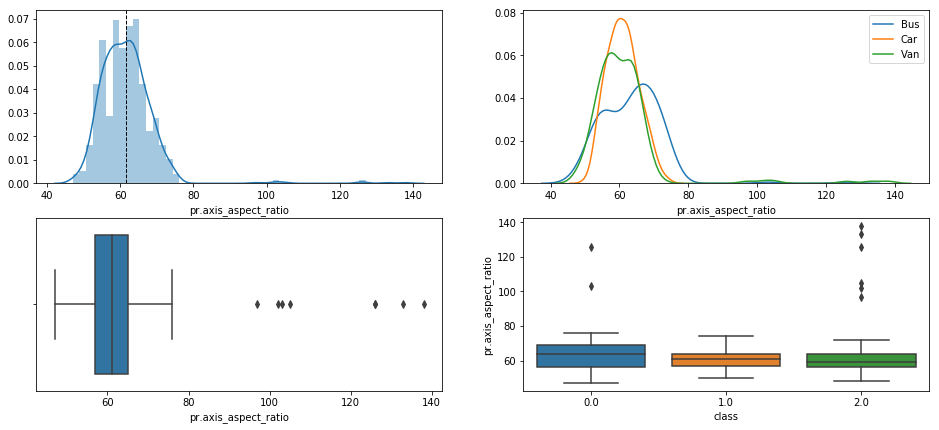

In [533]:
# pr.axis_aspect_ratio - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['pr.axis_aspect_ratio'])
plt.axvline(vehicle_df['pr.axis_aspect_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['pr.axis_aspect_ratio'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['pr.axis_aspect_ratio'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['pr.axis_aspect_ratio'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['pr.axis_aspect_ratio'], kde=True, hist=False, label='Car')
sns.distplot(van_df['pr.axis_aspect_ratio'], kde=True, hist=False, label='Van')

print('Column axis_aspect_ratio skew:', vehicle_df['pr.axis_aspect_ratio'].skew())

# Distribution is right skewed, indicating presence of outliers.
# There are outliers in the 'bus' & van' categories of vehicles.
# The axis_aspect_ratio median for bus is high, followed by car and then van.
# The density plots are overlapping for each vehicle type.

In [534]:
# Identify outliers
outliers = identify_outliers(vehicle_df, 'pr.axis_aspect_ratio')
outliers

# vehicle_df.loc[vehicle_df['pr.axis_aspect_ratio'] > 77, 'pr.axis_aspect_ratio'] = 77
# The values which are identified as outliers are natural. Hence no need to remove them.
# They may form a cluster of their own, so will not alter them.

Column: pr.axis_aspect_ratio
IQR: 8.0
Lower Limit - 45.0
Upper Limit - 77.0


compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         306.0   
100         82.0         45.0                  66.0         252.0   
135         89.0         47.0                  83.0         322.0   
291         89.0         45.0                  81.0         246.0   
388         94.0         47.0                  85.0         333.0   
523         90.0         43.0                  81.0         231.0   
706         82.0         43.0                  70.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
100                 126.0                     52.0          148.0   
135                 133.0                     48.0          158.0   
291                 102.0                     43.0          155.0   
388                 138.0                     49.0          155.0   
523                  97.0                     46.0          150.0   
706                 105.0                     55.0          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
100           45.0                    19.0                      144.0   
135           43.0                    20.0                      163.0   
291           44.0                    20.0                      160.0   
388           43.0                    19.0                      155.0   
523           45.0                    19.0                      149.0   
706           48.0                    18.0                      145.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   
388                        135.0            12.0               9.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    0.0  
37              185.0          194.0    2.0  
100             181.0          185.0    0.0  
135             184.0          194.0    2.0  
291             183.0          192.0    2.0  
388             188.0          196.0    2.0  
523             186.0          196.0    2.0  
706             190.0          199.0    2.0

Column max.length_aspect_ratio skew: 6.7783936191089476


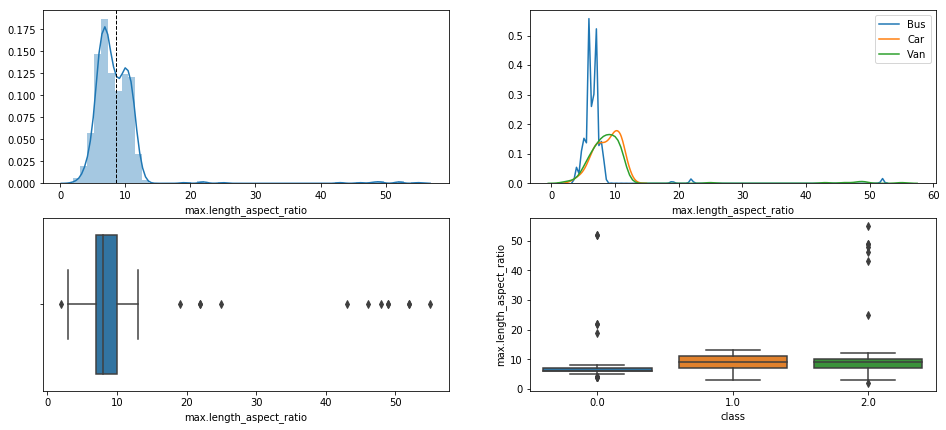

In [535]:
# max.length_aspect_ratio - Numerical/Discrete
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['max.length_aspect_ratio'])
plt.axvline(vehicle_df['max.length_aspect_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['max.length_aspect_ratio'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['max.length_aspect_ratio'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['max.length_aspect_ratio'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['max.length_aspect_ratio'], kde=True, hist=False, label='Car')
sns.distplot(van_df['max.length_aspect_ratio'], kde=True, hist=False, label='Van')

print('Column max.length_aspect_ratio skew:', vehicle_df['max.length_aspect_ratio'].skew())

# Distribution is right skewed, indicating presence of outliers, bi-modal.
# There are outliers in the 'bus' & van' categories of vehicles.
# The length_aspect_ratio median for car is high, followed by car and then van.
# The density plots are overlapping for each vehicle type.

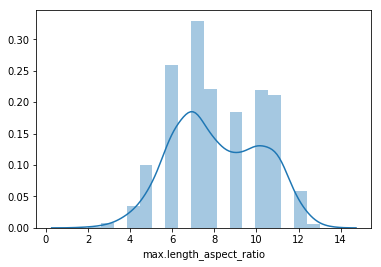

In [536]:
# Majority of the data lies between 0 & 15
sns.distplot(vehicle_df[(vehicle_df['max.length_aspect_ratio']>0) & (vehicle_df['max.length_aspect_ratio']<15)]['max.length_aspect_ratio'])

In [537]:
# Identify outliers
outliers = identify_outliers(vehicle_df, 'max.length_aspect_ratio')
outliers

# The values which are identified as outliers are natural. Hence no need to remove them.
# They may form a cluster of their own, so will not alter them.

Column: max.length_aspect_ratio
IQR: 3.0
Lower Limit - 2.5
Upper Limit - 14.5


compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         306.0   
100         82.0         45.0                  66.0         252.0   
127         85.0         41.0                  66.0         155.0   
135         89.0         47.0                  83.0         322.0   
291         89.0         45.0                  81.0         246.0   
388         94.0         47.0                  85.0         333.0   
391         91.0         38.0                  70.0         160.0   
523         90.0         43.0                  81.0         231.0   
544         88.0         43.0                  70.0         177.0   
655         86.0         35.0                  44.0         110.0   
706         82.0         43.0                  70.0         250.0   
815         81.0         45.0                  68.0         154.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
100                 126.0                     52.0          148.0   
127                  65.0                     22.0          149.0   
135                 133.0                     48.0          158.0   
291                 102.0                     43.0          155.0   
388                 138.0                     49.0          155.0   
391                  66.0                     25.0          140.0   
523                  97.0                     46.0          150.0   
544                  74.0                     19.0          152.0   
655                  54.0                      2.0          119.0   
706                 105.0                     55.0          139.0   
815                  69.0                     22.0          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
100           45.0                    19.0                      144.0   
127           45.0                    19.0                      139.0   
135           43.0                    20.0                      163.0   
291           44.0                    20.0                      160.0   
388           43.0                    19.0                      155.0   
391           47.0                    18.0                      139.0   
523           45.0                    19.0                      149.0   
544           44.0                    19.0                      143.0   
655           57.0                    17.0                      121.0   
706           48.0                    18.0                      145.0   
815           45.0                    19.0                      147.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
127            173.0              330.0                      155.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
391            162.0              296.0                      130.0   
523            200.0              332.0                      164.0   
544            180.0              342.0                      168.0   
655            139.0              208.0                      137.0   
706            231.0              289.0                      172.0   
815            186.0              335.0                      186.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1 

In [538]:
# Impute the lower outlier with the LowerLimit value as it looks like an anamoly
vehicle_df.loc[vehicle_df['max.length_aspect_ratio'] == 2, 'max.length_aspect_ratio'] = 2.5

# Verified that it has been imputed

Column scatter_ratio skew: 0.6057869414538846


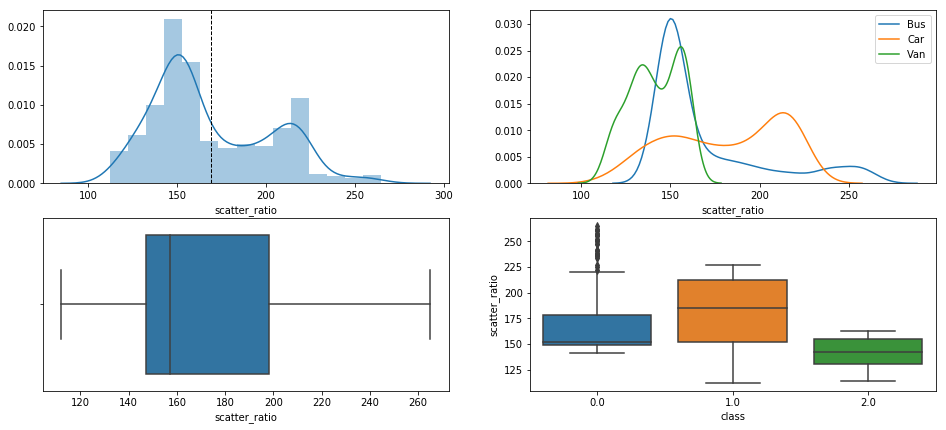

In [539]:
# scatter_ratio - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['scatter_ratio'])
plt.axvline(vehicle_df['scatter_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['scatter_ratio'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['scatter_ratio'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['scatter_ratio'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['scatter_ratio'], kde=True, hist=False, label='Car')
sns.distplot(van_df['scatter_ratio'], kde=True, hist=False, label='Van')

print('Column scatter_ratio skew:', vehicle_df['scatter_ratio'].skew())

# Distribution is mostly normal, bi-modal.
# There are outliers in the col as a wholes, but we see some outliers in 'bus' categories of vehicles. No need to impute.
# The scatter_ratio median for car is high, followed by bus and then van.
# The density plots are mostly overlapping for each vehicle type.

Column elongatedness skew: 0.049787187247753786


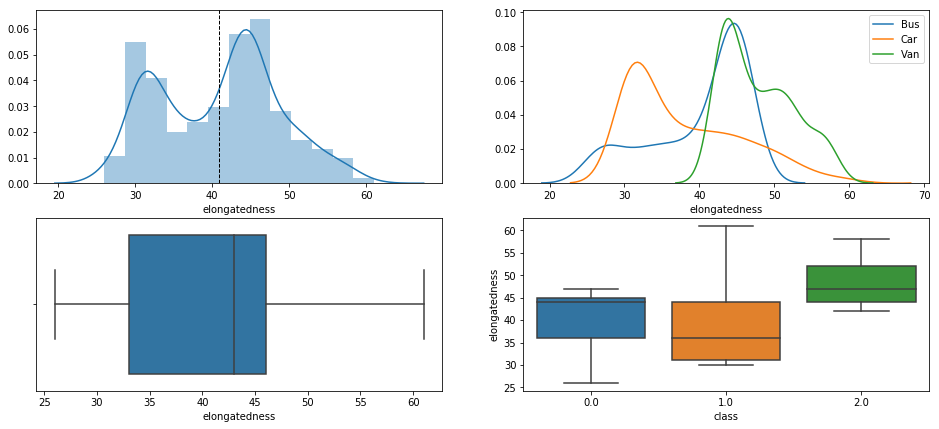

In [540]:
# elongatedness - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['elongatedness'])
plt.axvline(vehicle_df['elongatedness'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['elongatedness'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['elongatedness'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['elongatedness'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['elongatedness'], kde=True, hist=False, label='Car')
sns.distplot(van_df['elongatedness'], kde=True, hist=False, label='Van')

print('Column elongatedness skew:', vehicle_df['elongatedness'].skew())

# Distribution is mostly normal, bi-modal.
# There are no outliers.
# The elongatedness median for van is high, followed by bus and then car.
# The density plots show clearly that elongatedness is less for car and more for bus and van.

Column pr.axis_rectangularity skew: 0.7724920061151503


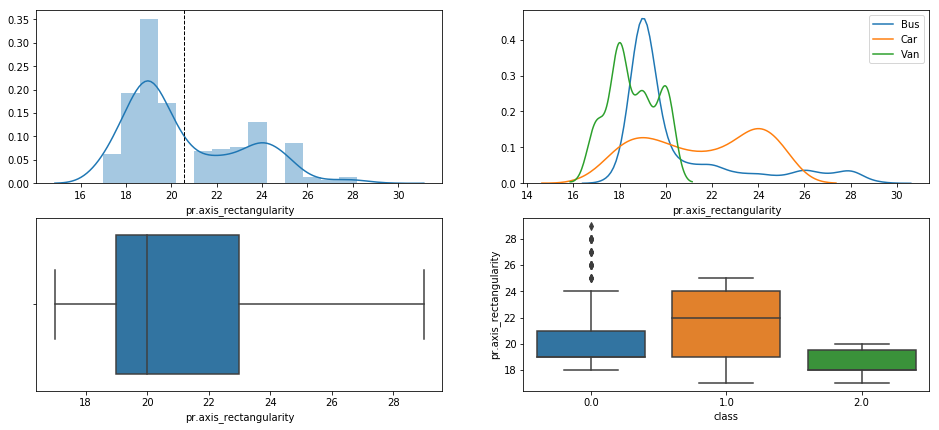

In [541]:
# pr.axis_rectangularity - Numerical/Discrete
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['pr.axis_rectangularity'])
plt.axvline(vehicle_df['pr.axis_rectangularity'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['pr.axis_rectangularity'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['pr.axis_rectangularity'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['pr.axis_rectangularity'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['pr.axis_rectangularity'], kde=True, hist=False, label='Car')
sns.distplot(van_df['pr.axis_rectangularity'], kde=True, hist=False, label='Van')

print('Column pr.axis_rectangularity skew:', vehicle_df['pr.axis_rectangularity'].skew())

# Distribution is right skewed, multiple gaussians.
# No outliers, but we see some present in bus category.
# The axis_rectangularity median for car is high, compared to bus and van.
# The density plots show clearly that axis_rectangularity for van is between 16 - 21, but more widespread for bus and car.

Column max.length_rectangularity skew: 0.2563591641353724


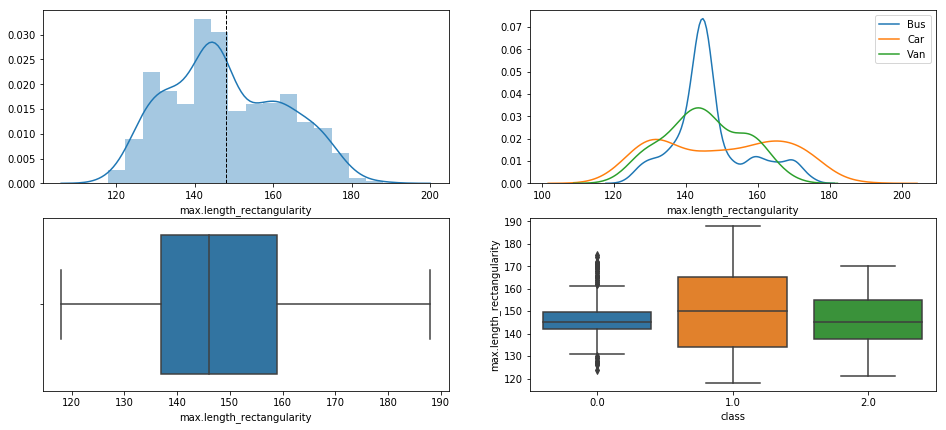

In [542]:
# max.length_rectangularity - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['max.length_rectangularity'])
plt.axvline(vehicle_df['max.length_rectangularity'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['max.length_rectangularity'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['max.length_rectangularity'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['max.length_rectangularity'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['max.length_rectangularity'], kde=True, hist=False, label='Car')
sns.distplot(van_df['max.length_rectangularity'], kde=True, hist=False, label='Van')

print('Column max.length_rectangularity skew:', vehicle_df['max.length_rectangularity'].skew())

# Distribution is mostly normal, multiple gaussians.
# No Outliers, but some are seen in bus category.
# The length_rectangularity median for car is high, compared to bus and van.
# The density plots are overlapping.

Column scaled_variance skew: 0.6500128073295086


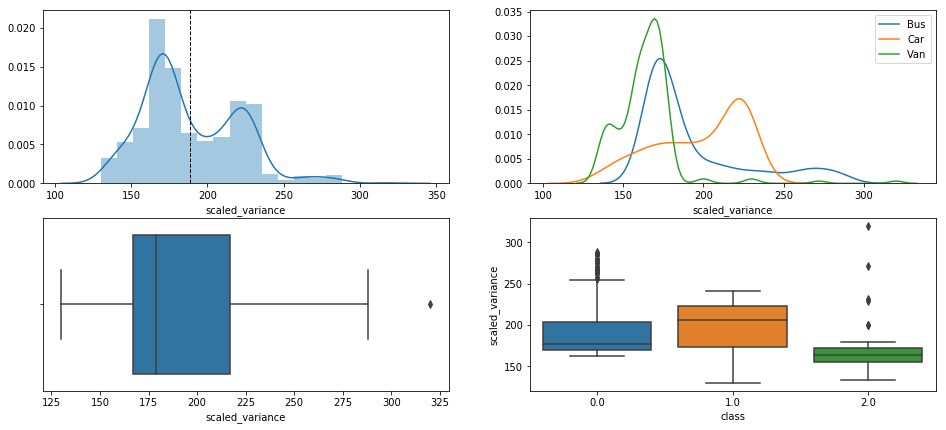

In [543]:
# scaled_variance - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['scaled_variance'])
plt.axvline(vehicle_df['scaled_variance'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['scaled_variance'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['scaled_variance'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['scaled_variance'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['scaled_variance'], kde=True, hist=False, label='Car')
sns.distplot(van_df['scaled_variance'], kde=True, hist=False, label='Van')

print('Column scaled_variance skew:', vehicle_df['scaled_variance'].skew())

# Distribution is right skewed, multiple gaussians.
# Outliers are present in bus and van categories.
# The scaled_variance median for car is high, followed by bus and then van.
# The density plots are overlapping.

In [544]:
# Identify outliers
outliers = identify_outliers(vehicle_df, 'scaled_variance')
outliers

# The values which are identified as outliers are natural. Hence no need to remove them.
# They may form a cluster of their own, so will not alter them.

Column: scaled_variance
IQR: 50.0
Lower Limit - 92.0
Upper Limit - 292.0


compactness  circularity  distance_circularity  radius_ratio  \
388         94.0         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
388                 138.0                     49.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
388             188.0          196.0    2.0

In [545]:
# Impute the single outlier with the UpperLimit value as it is very far from the other data
vehicle_df.loc[vehicle_df['scaled_variance'] == 320.0, 'scaled_variance'] = 292

# Verified that it has been imputed

Column scaled_radius_of_gyration skew: 0.2793636603938484


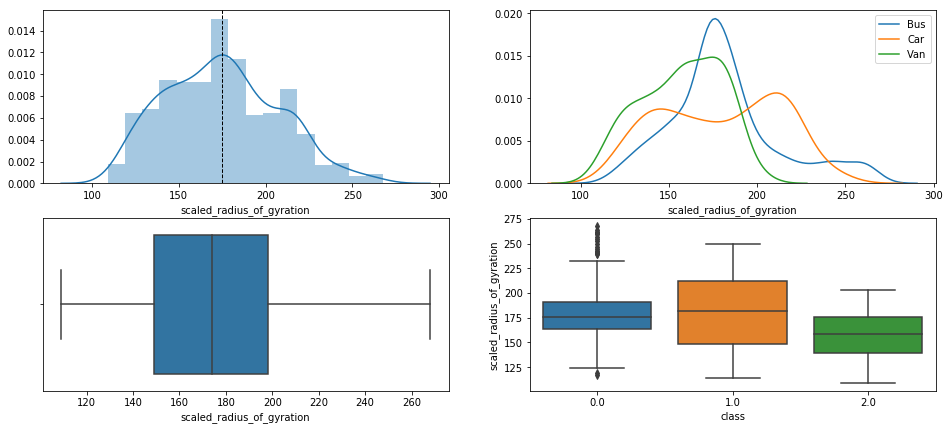

In [546]:
# scaled_radius_of_gyration - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['scaled_radius_of_gyration'])
plt.axvline(vehicle_df['scaled_radius_of_gyration'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['scaled_radius_of_gyration'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['scaled_radius_of_gyration'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['scaled_radius_of_gyration'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['scaled_radius_of_gyration'], kde=True, hist=False, label='Car')
sns.distplot(van_df['scaled_radius_of_gyration'], kde=True, hist=False, label='Van')

print('Column scaled_radius_of_gyration skew:', vehicle_df['scaled_radius_of_gyration'].skew())

# Distribution is mostly normal, multiple gaussians.
# No Outliers, but some are present in bus category.
# The median for car is high, followed by bus and then van.
# The density plots are overlapping.

Column scaled_radius_of_gyration.1 skew: 2.088197361002662


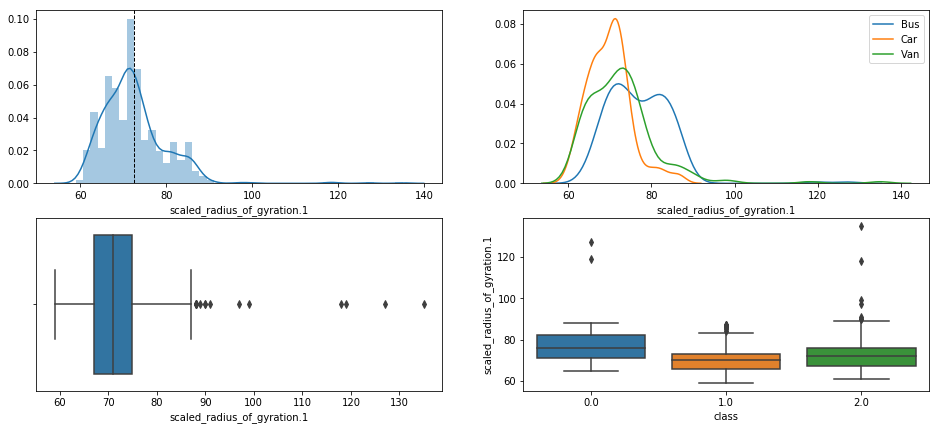

In [547]:
# scaled_radius_of_gyration.1 - Numerical/Continuous
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['scaled_radius_of_gyration.1'])
plt.axvline(vehicle_df['scaled_radius_of_gyration.1'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['scaled_radius_of_gyration.1'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['scaled_radius_of_gyration.1'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['scaled_radius_of_gyration.1'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['scaled_radius_of_gyration.1'], kde=True, hist=False, label='Car')
sns.distplot(van_df['scaled_radius_of_gyration.1'], kde=True, hist=False, label='Van')

print('Column scaled_radius_of_gyration.1 skew:', vehicle_df['scaled_radius_of_gyration.1'].skew())

# Distribution is right skewed, multiple gaussians.
# Outliers are present in all categories.
# The median for bus is high, followed by van and then bus.
# The density plots are overlapping.

In [548]:
# Identify outliers
outliers = identify_outliers(vehicle_df, 'scaled_radius_of_gyration.1')
outliers

# The values which are identified as outliers are natural. Hence no need to remove them.
# They may form a cluster of their own, so will not alter them.

Column: scaled_radius_of_gyration.1
IQR: 8.0
Lower Limit - 55.0
Upper Limit - 87.0


compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         306.0   
47          85.0         42.0                  66.0         122.0   
79          89.0         44.0                  68.0         113.0   
100         82.0         45.0                  66.0         252.0   
135         89.0         47.0                  83.0         322.0   
230         85.0         35.0                  47.0         110.0   
291         89.0         45.0                  81.0         246.0   
381        106.0         54.0                 100.0         227.0   
388         94.0         47.0                  85.0         333.0   
498         88.0         36.0                  53.0         113.0   
523         90.0         43.0                  81.0         231.0   
655         86.0         35.0                  44.0         110.0   
706         82.0         43.0                  70.0         250.0   
815         81.0         45.0                  68.0         154.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
47                   54.0                      6.0          148.0   
79                   50.0                      7.0          150.0   
100                 126.0                     52.0          148.0   
135                 133.0                     48.0          158.0   
230                  55.0                      3.0          117.0   
291                 102.0                     43.0          155.0   
381                  67.0                      4.0          250.0   
388                 138.0                     49.0          155.0   
498                  57.0                      3.0          118.0   
523                  97.0                     46.0          150.0   
655                  54.0                      2.5          119.0   
706                 105.0                     55.0          139.0   
815                  69.0                     22.0          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
47            46.0                    19.0                      141.0   
79            45.0                    19.0                      147.0   
100           45.0                    19.0                      144.0   
135           43.0                    20.0                      163.0   
230           57.0                    17.0                      122.0   
291           44.0                    20.0                      160.0   
381           27.0                    27.0                      162.0   
388           43.0                    19.0                      155.0   
498           57.0                    17.0                      128.0   
523           45.0                    19.0                      149.0   
655           57.0                    17.0                      121.0   
706           48.0                    18.0                      145.0   
815           45.0                    19.0                      147.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
47             172.0              317.0                      174.0   
79             171.0              328.0                      189.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
230            136.0              203.0                      139.0   
291            200.0              347.0                      177.0

Column skewness_about skew: 0.7832166160771099


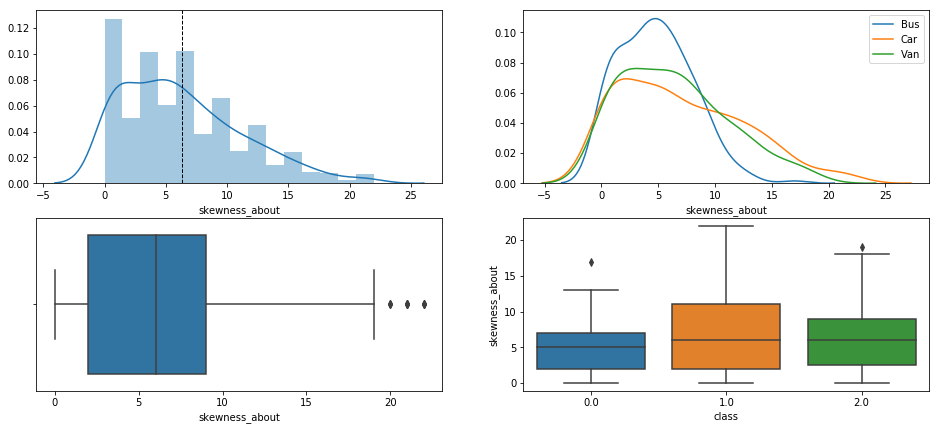

In [549]:
# skewness_about - Numerical/Discrete
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['skewness_about'])
plt.axvline(vehicle_df['skewness_about'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['skewness_about'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['skewness_about'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['skewness_about'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['skewness_about'], kde=True, hist=False, label='Car')
sns.distplot(van_df['skewness_about'], kde=True, hist=False, label='Van')

print('Column skewness_about skew:', vehicle_df['skewness_about'].skew())

# Distribution is right skewed.
# Outliers are present in bus and van categories.
# The median for bus is lower than van and car.
# The density plots are overlapping.

In [550]:
# Identify outliers
outliers = identify_outliers(vehicle_df, 'skewness_about')
outliers

# The values which are identified as outliers are natural. Hence no need to remove them.
# They may form a cluster of their own, so will not alter them.

Column: skewness_about
IQR: 7.0
Lower Limit - -8.5
Upper Limit - 19.5


compactness  circularity  distance_circularity  radius_ratio  \
44         119.0         54.0                 106.0         220.0   
113         88.0         35.0                  50.0         121.0   
123         90.0         36.0                  57.0         130.0   
190         97.0         48.0                  94.0         198.0   
346        117.0         52.0                 110.0         228.0   
400        107.0         53.0                 108.0         213.0   
505        115.0         53.0                 100.0         205.0   
516         92.0         42.0                  75.0         172.0   
623        106.0         52.0                 108.0         207.0   
761        115.0         51.0                 100.0         201.0   
796         85.0         38.0                  63.0         130.0   
797        111.0         53.0                 108.0         211.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
44                   65.0                     12.0          213.0   
113                  58.0                      5.0          114.0   
123                  57.0                      6.0          121.0   
190                  63.0                      9.0          181.0   
346                  65.0                     12.0          212.0   
400                  64.0                     12.0          206.0   
505                  64.0                     11.0          220.0   
516                  60.0                      8.0          147.0   
623                  64.0                     12.0          221.0   
761                  60.0                     12.0          196.0   
796                  55.0                      7.0          122.0   
797                  61.0                     11.0          207.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
44            31.0                    24.0                      167.0   
113           59.0                    17.0                      122.0   
123           56.0                    17.0                      127.0   
190           36.0                    21.0                      155.0   
346           31.0                    24.0                      163.0   
400           32.0                    23.0                      163.0   
505           30.0                    25.0                      166.0   
516           45.0                    19.0                      142.0   
623           31.0                    25.0                      168.0   
761           34.0                    23.0                      162.0   
796           55.0                    17.0                      130.0   
797           32.0                    23.0                      167.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
44             223.0              675.0                      232.0   
113            132.0              192.0                      138.0   
123            137.0              216.0                      132.0   
190            200.0              494.0                      189.0   
346            228.0              668.0                      220.0   
400            216.0              627.0                      202.0   
505            229.0              710.0                      214.0   
516            174.0              322.0                      160.0   
623            229.0              709.0                      200.0   
761            207.0              573.0                      184.0   
796            137.0              219.0                      144.0   
797            217.0              636.0                      216.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
44                          66.0            20.0               1.0   
113                         74.0            21.0               4.0   
123                         68.0            22.0              23.0   
190                         64.0            20.0              11.0  

Column skewness_about.1 skew: 0.6878411073072661


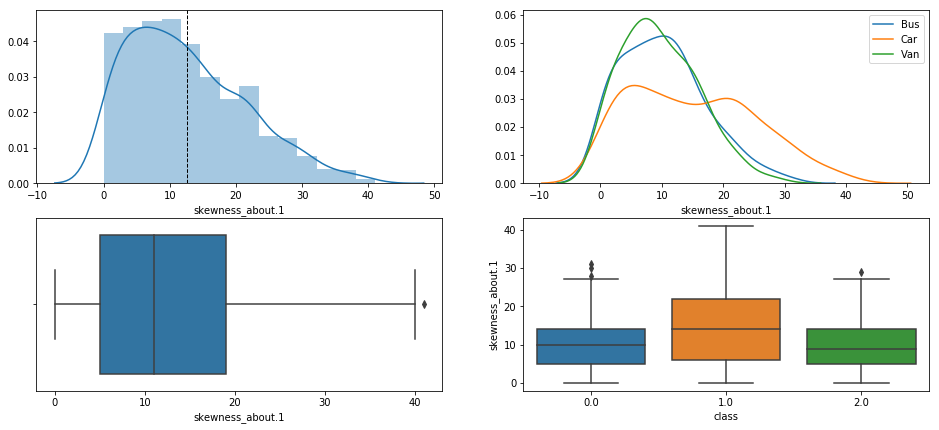

In [551]:
# skewness_about.1 - Numerical/Discrete
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['skewness_about.1'])
plt.axvline(vehicle_df['skewness_about.1'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['skewness_about.1'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['skewness_about.1'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['skewness_about.1'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['skewness_about.1'], kde=True, hist=False, label='Car')
sns.distplot(van_df['skewness_about.1'], kde=True, hist=False, label='Van')

print('Column skewness_about.1 skew:', vehicle_df['skewness_about.1'].skew())

# Distribution is right skewed.
# Outliers are present in bus and van categories.
# The median for bus and van are equal but lower than car.
# The density plots are overlapping, but cars are clearly distingishable after 35.

In [552]:
# Identify outliers
outliers = identify_outliers(vehicle_df, 'skewness_about.1')
outliers

# The single identified outliers is just above the upper limit, hence no need to remove it.

Column: skewness_about.1
IQR: 14.0
Lower Limit - -16.0
Upper Limit - 40.0


compactness  circularity  distance_circularity  radius_ratio  \
132         97.0         42.0                 101.0         186.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
132                  59.0                      9.0          186.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
132           36.0                    22.0                      138.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
132            208.0              511.0                      168.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
132                         67.0             7.0              41.0   

     skewness_about.2  hollows_ratio  class  
132             194.0          206.0    1.0

Column skewness_about.2 skew: 0.24942108096999444


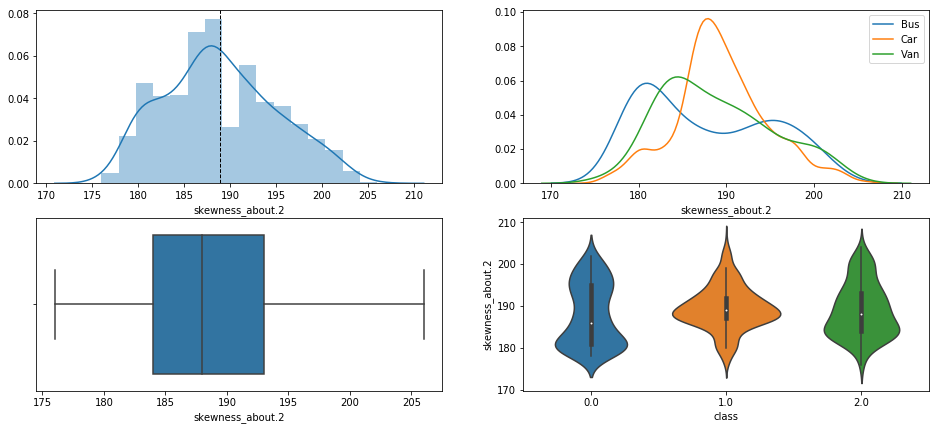

In [553]:
# skewness_about.2 - Numerical/Discrete
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['skewness_about.2'])
plt.axvline(vehicle_df['skewness_about.2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['skewness_about.2'], orient='h')
plt.subplot(224)
sns.violinplot(x=vehicle_df['class'], y=vehicle_df['skewness_about.2'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['skewness_about.2'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['skewness_about.2'], kde=True, hist=False, label='Car')
sns.distplot(van_df['skewness_about.2'], kde=True, hist=False, label='Van')

print('Column skewness_about.2 skew:', vehicle_df['skewness_about.2'].skew())

# Distribution is almost normal.
# No Outliers, but some are present in car category.
# The median for car is higher than van and bus.
# The density plots are overlapping.

Column hollows_ratio skew: -0.22634128032982512


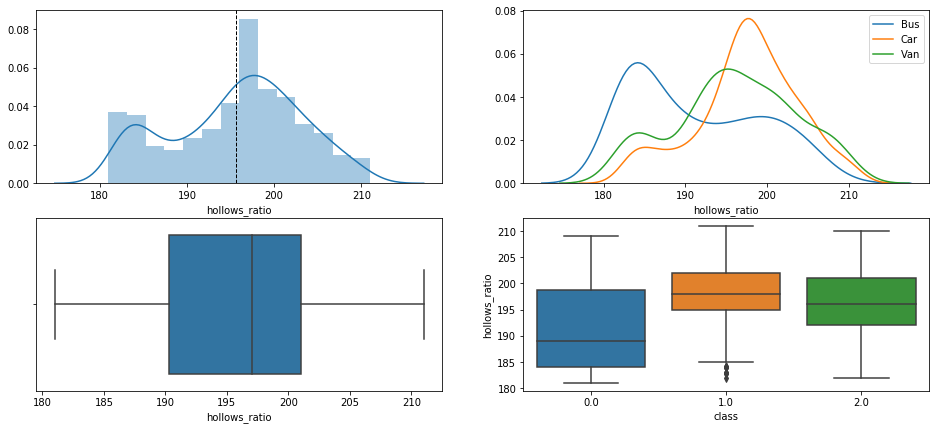

In [554]:
# hollows_ratio - Numerical/Discrete
plt.figure(1, figsize=(16,7))
plt.subplot(221)
sns.distplot(vehicle_df['hollows_ratio'])
plt.axvline(vehicle_df['hollows_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.subplot(223)
sns.boxplot(vehicle_df['hollows_ratio'], orient='h')
plt.subplot(224)
sns.boxplot(x=vehicle_df['class'], y=vehicle_df['hollows_ratio'], orient='vert')
plt.subplot(222)
# Look at the Probability Density Function
sns.distplot(bus_df['hollows_ratio'], kde=True, hist=False, label='Bus')
sns.distplot(car_df['hollows_ratio'], kde=True, hist=False, label='Car')
sns.distplot(van_df['hollows_ratio'], kde=True, hist=False, label='Van')

print('Column hollows_ratio skew:', vehicle_df['hollows_ratio'].skew())

# Distribution has a negative skew, bi-modal.
# No Outliers, but some are present in car category.
# The median for car is high followed by van and then bus.
# The density plots are overlapping.

##### Bivariate Analysis

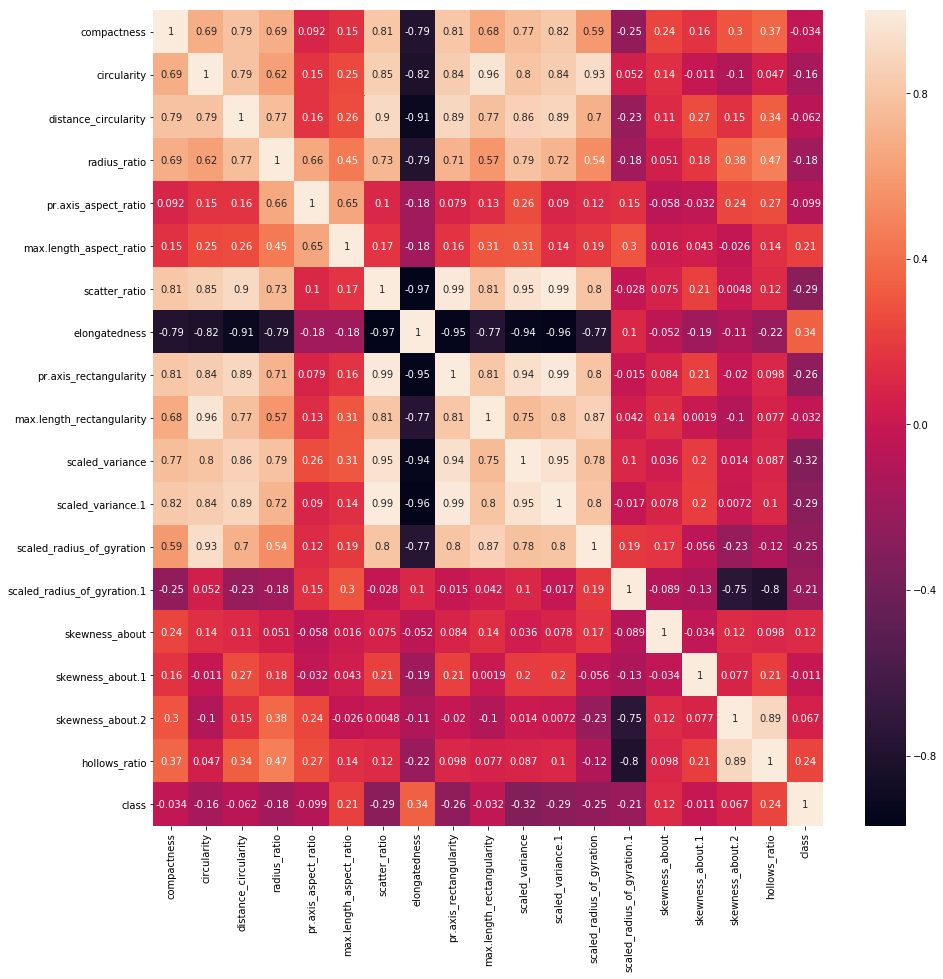

In [555]:
# Heatmap to see correlation between each and every column
plt.subplots(figsize = (15,15))
sns.heatmap(vehicle_df.corr(), annot=True)

# Class variable shows high correlation with the below variables
# High Positive corr - elongatedness, hollows_ratio, max.length_aspect_ratio
# High Negative corr - scaled_variance, scatter_ratio, scaled_variance.1, pr.axis_rectangularity

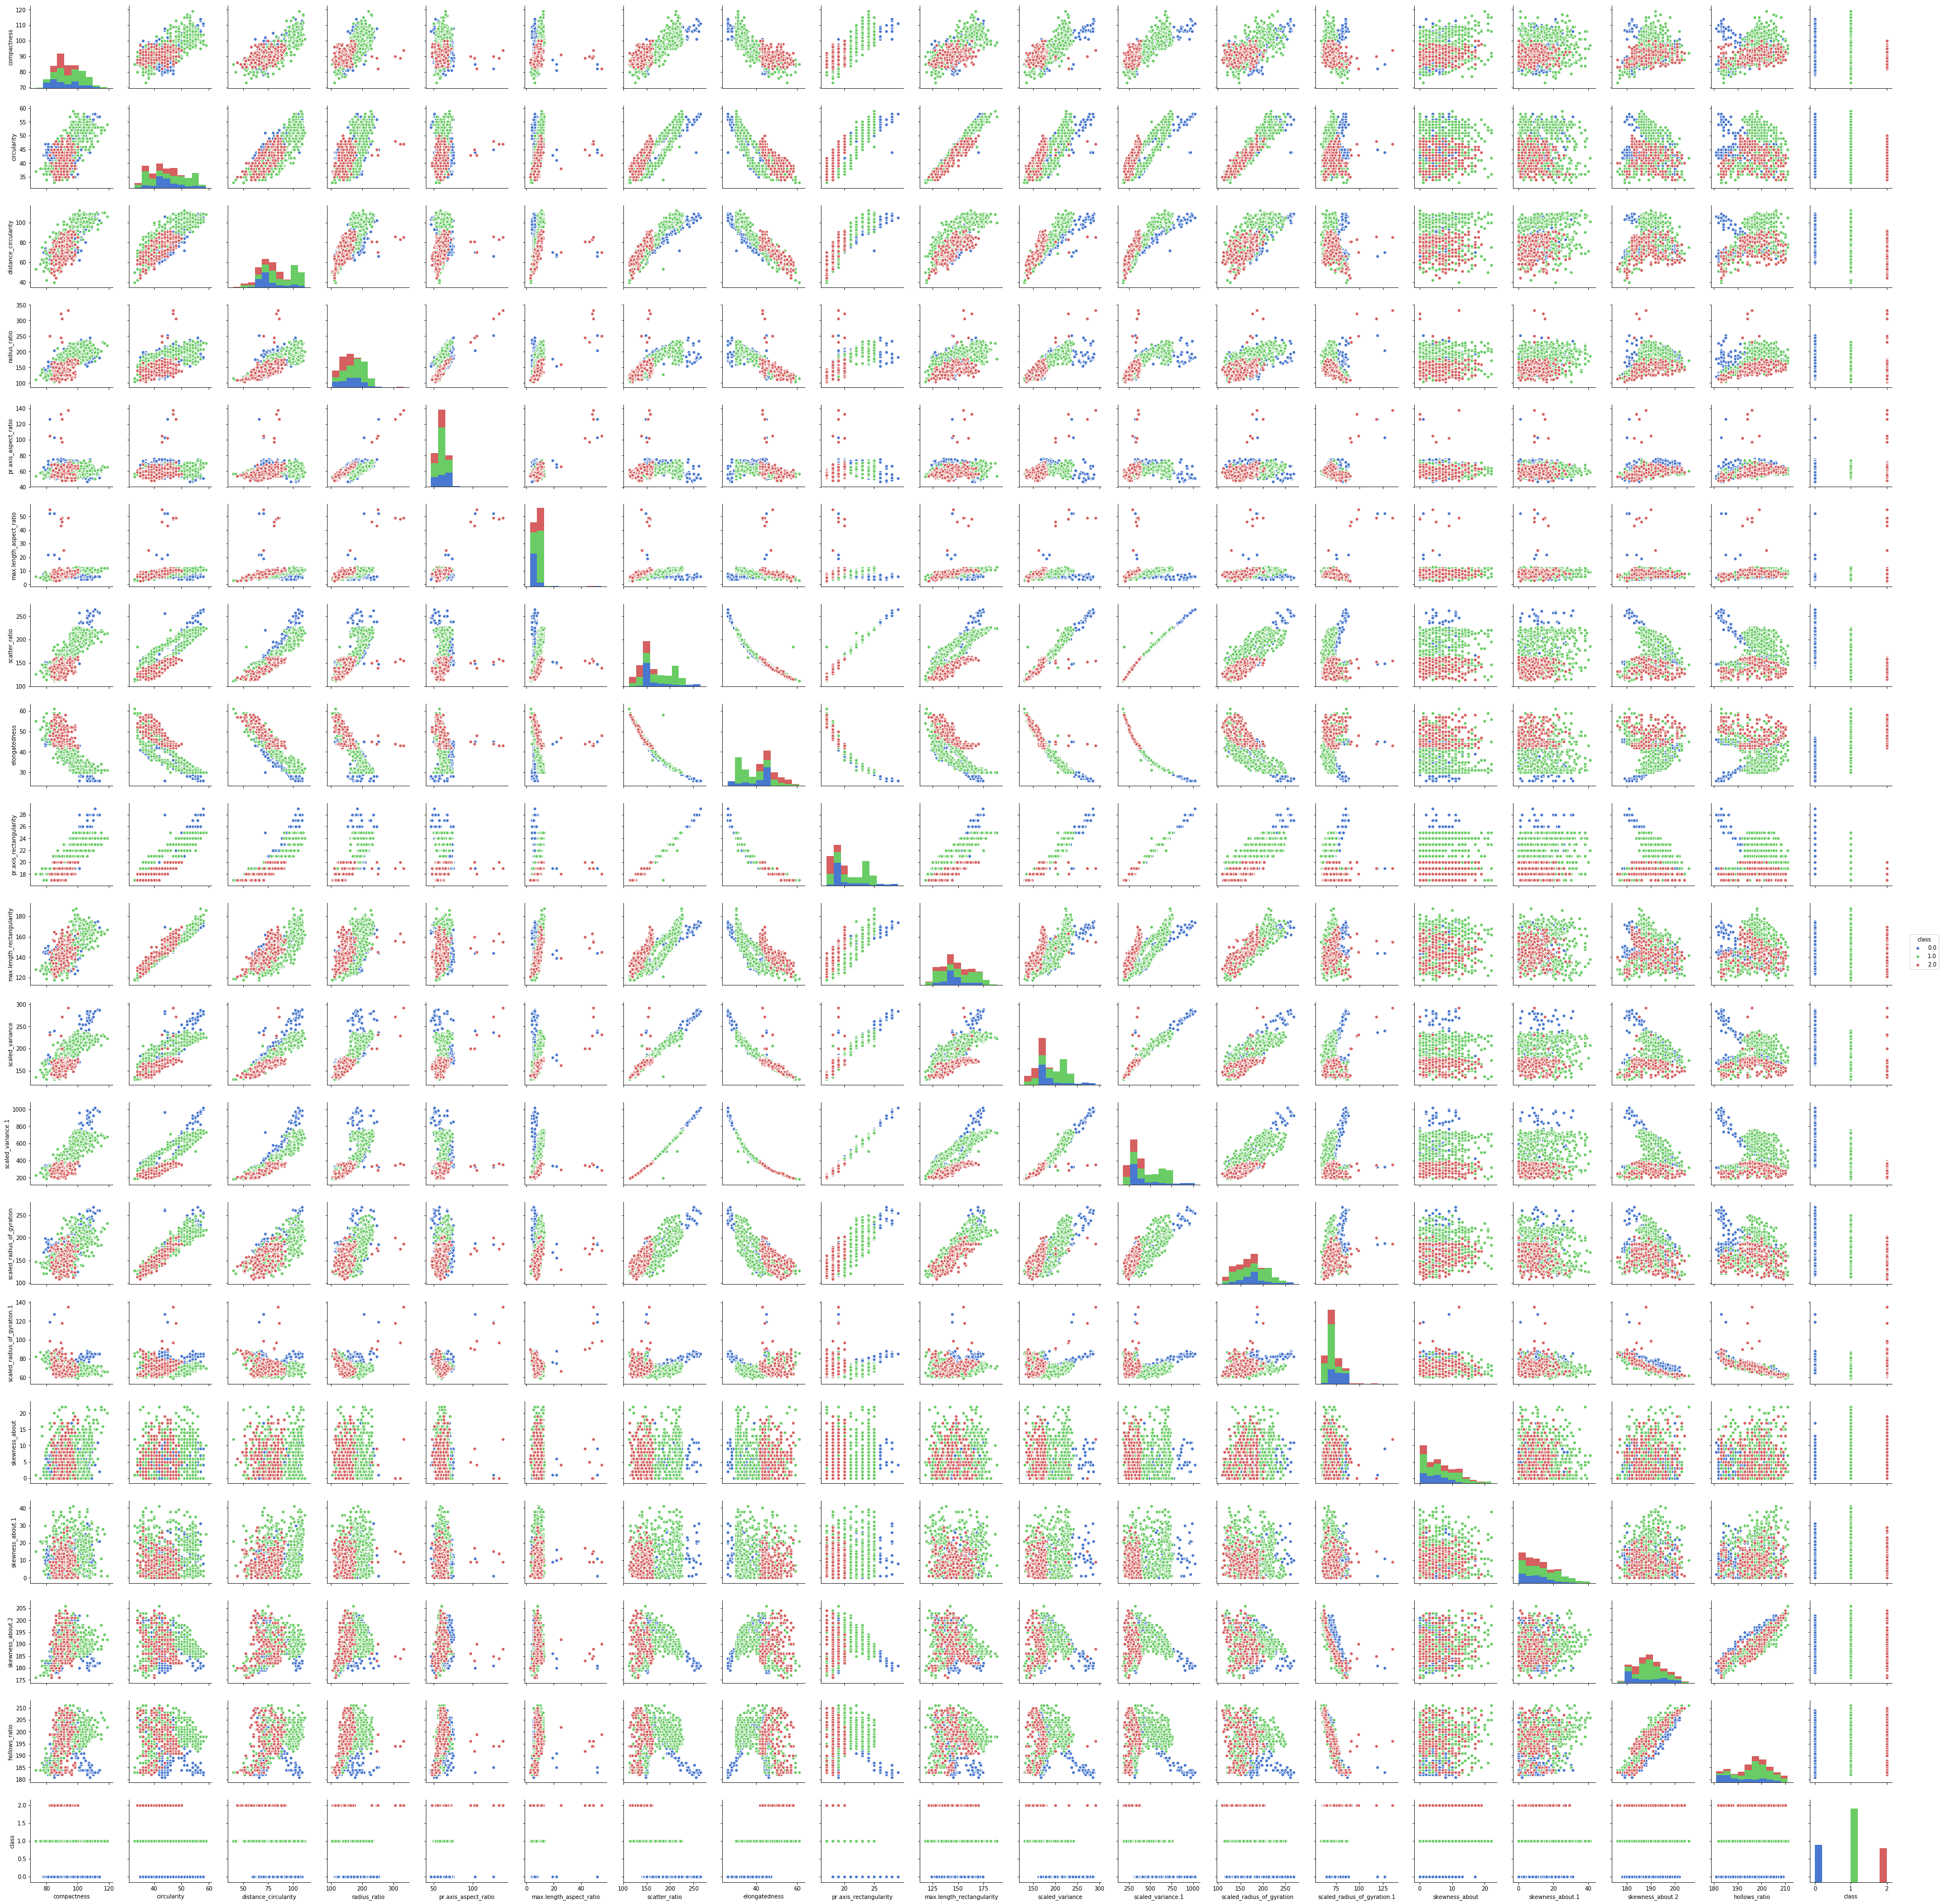

In [556]:
# Use pairplot() to plot pairwise relationships between all columns in the dataset
sns.pairplot(vehicle_df, hue="class", palette="muted")

# There are several features which are exhibiting high correlation between each other. 
# So performing PCA will help reduce dimensionality by removing the highly related ones.

# Elongatedness, scaled_variance and scatter_ratio seem to be important classifiers

##### Train-Test Split

In [557]:
# Separate the independent attributes from the target variable
X = vehicle_df.drop(columns=['class'], axis=1)
y = pd.DataFrame(vehicle_df['class'])

print('X:', X.shape)
print('y:', y.shape)

X: (846, 18)
y: (846, 1)


In [558]:
# Create the training and test data set in the ratio of 75:25 respectively
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (634, 18)
X_test: (212, 18)
y_train: (634, 1)
y_test: (212, 1)


##### Test the accuracy of the model without standardization and dimensionality reduction

In [559]:
# Create logistic regression object 
reg = LogisticRegression() 
   
# Train the model using the training set with reduced dimensions 
reg.fit(X_train, y_train) 
  
# Making predictions on the testing set 
y_pred = reg.predict(X_test) 

# Comparing actual response values (y_test) with predicted response values (y_pred) 
LR_acc = round(accuracy_score(y_test, y_pred), 2)*100
print("Logistic Regression model accuracy(in %):", LR_acc)

Logistic Regression model accuracy(in %): 96.0


##### Standardize the data

In [560]:
X_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
299         98.0         40.0                  77.0         171.0   
602        100.0         51.0                 109.0         231.0   
218         83.0         44.0                  68.0         144.0   
661        110.0         46.0                 100.0         197.0   
670         95.0         51.0                  96.0         196.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
299                  61.0                      6.0          172.0   
602                  70.0                     11.0          220.0   
218                  61.0                      8.0          147.0   
661                  61.0                      9.0          193.0   
670                  63.0                      9.0          190.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
299           37.0                    21.0                      139.0   
602           30.0                    25.0                      163.0   
218           45.0                    19.0                      143.0   
661           34.0                    22.0                      149.0   
670           35.0                    22.0                      161.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
299            197.0              457.0                      141.0   
602            238.0              722.0                      206.0   
218            170.0              325.0                      180.0   
661            209.0              561.0                      160.0   
670            208.0              543.0                      235.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
299                         72.0             4.0              17.0   
602                         73.0            11.0              19.0   
218                         74.0             1.0               1.0   
661                         65.0            11.0               7.0   
670                         68.0            13.0               0.0   

     skewness_about.2  hollows_ratio  
299             199.0          201.0  
602             189.0          198.0  
218             185.0          191.0  
661             194.0          203.0  
670             191.0          198.0

In [561]:
# # Since the dimensions of the data are different, we will standardize the data using the Standard Scaler
from sklearn.preprocessing import StandardScaler

# Fit the scaling on the training data
sc = StandardScaler()
sc.fit(X_train)

# Transform both the train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [562]:
X_train = pd.DataFrame(X_train, columns=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'])

In [563]:
X_test = pd.DataFrame(X_test, columns=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'])

In [564]:
X_test.head()

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.477148     0.184631             -0.468868     -1.108162   
1     1.832102     1.158747              0.785669      0.594312   
2     0.738247    -0.627132             -0.468868      1.080734   
3     0.738247     0.671689             -0.155234      1.111135   
4     0.130549    -0.464779              0.848396      0.837523   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.920385                 0.556701      -0.288840   
1             -0.503979                -1.025521       1.710730   
2              1.300449                -0.799490       0.188669   
3              1.161647                -0.573458       0.397579   
4              0.467636                 0.104638       0.248358   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.283162               -0.242152                   0.893778   
1      -1.495568                1.672117                   0.686161   
2      -0.606203                0.140702                  -0.697950   
3      -0.733255                0.140702                   0.547750   
4      -0.479151                0.140702                  -0.490333   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.511688          -0.418822                  -0.129096   
1         2.314791           1.862382                   1.258647   
2         0.472816           0.197719                  -0.732462   
3         0.536333           0.410707                   0.685449   
4         0.314025           0.169695                  -0.792799   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.644679       -1.295757          0.370611   
1                     1.327711       -1.295757          0.698931   
2                    -0.038353        0.164891          0.698931   
3                     0.098253       -0.669765          0.042291   
4                    -0.721385       -1.087093          1.793331   

   skewness_about.2  hollows_ratio  
0         -1.160053      -0.512882  
1         -0.336823      -1.314445  
2          1.309637       0.155087  
3          1.474283       0.422274  
4          0.651053       0.555868

In [565]:
# All the columns are in the same scale. We get the same results using the zscore functions

##### Test the accuracy of the model after standardization but before dimensionality reduction

In [566]:
# Create logistic regression object 
reg = LogisticRegression() 
   
# Train the model using the training set with reduced dimensions 
reg.fit(X_train, y_train) 
  
# Making predictions on the testing set 
y_pred = reg.predict(X_test) 

# Comparing actual response values (y_test) with predicted response values (y_pred) 
LR_acc = round(accuracy_score(y_test, y_pred), 2)*100
print("Logistic Regression model accuracy(in %):", LR_acc)

Logistic Regression model accuracy(in %): 94.0


##### Principal Components Analysis

In [567]:
# PCA
# Step 1 - Create covariance matrix

# cov_matrix = np.cov(vehicle_df_z.T)
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00157978e+00  6.88588615e-01  7.92371910e-01  7.04048709e-01
   9.08432375e-02  1.49000439e-01  8.10896080e-01 -7.84112601e-01
   8.13735741e-01  6.84536576e-01  7.66067320e-01  8.17460218e-01
   5.88099778e-01 -2.58378478e-01  2.35253841e-01  1.48579987e-01
   2.87650708e-01  3.60250090e-01]
 [ 6.88588615e-01  1.00157978e+00  7.93237036e-01  6.38778273e-01
   1.62582033e-01  2.45615401e-01  8.44767489e-01 -8.21241485e-01
   8.42612623e-01  9.62213408e-01  8.00411973e-01  8.37768956e-01
   9.24786022e-01  4.39863512e-02  1.54521101e-01 -1.32661121e-02
  -1.07177095e-01  4.74904365e-02]
 [ 7.92371910e-01  7.93237036e-01  1.00157978e+00  7.89490393e-01
   1.64601927e-01  2.60905749e-01  9.02057387e-01 -9.12323910e-01
   8.94201579e-01  7.75088718e-01  8.67391575e-01  8.87944170e-01
   7.07585716e-01 -2.45418350e-01  1.20071111e-01  2.70301903e-01
   1.51395524e-01  3.42827715e-01]
 [ 7.04048709e-01  6.38778273e-01  7.89490393e-01  1.00157978e+00
   6.37539071e-

##### Identify eigen values and eigen vector

In [568]:
# Step 2 - Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.74793267e-01  1.15343200e-01 -1.33256530e-01 -9.33791408e-02
  -6.26538192e-02 -6.93277721e-02 -4.53641289e-01 -5.95061218e-01
  -4.60797175e-01  2.54635288e-01 -5.28315467e-02  3.92338677e-02
  -1.51204134e-01 -9.42934669e-02  3.73307697e-02  3.77842671e-02
   1.21708829e-03  2.68796441e-03]
 [ 2.92313354e-01 -1.23500376e-01 -4.37887968e-03 -1.80777980e-01
   9.03095304e-02  2.79535962e-01  2.91659111e-01 -1.74158452e-01
   7.17787584e-03 -1.08185951e-01  2.38442078e-02 -2.20198811e-01
  -1.80029806e-01  4.69204692e-01  5.58249460e-01  1.83676105e-01
  -2.81639943e-02  7.32133785e-02]
 [ 3.04295069e-01  7.54713887e-02 -5.94326216e-02  6.38088870e-02
  -5.27053074e-02  1.39573469e-01 -2.97811425e-02  4.18954992e-01
  -1.97333824e-01  2.41490434e-01 -7.04109700e-01 -8.24844154e-02
   2.54124806e-01  5.82197276e-03  1.29011896e-01 -1.12184548e-01
   4.83466549e-03 -4.16823877e-02]
 [ 2.71742950e-01  2.00126301e-01  2.40541108e-01  3.92330316e-02
   4.04638912e-02 -

##### Find variance and cumulative variance by each eigen vector

In [569]:
tot = sum(eig_vals)
var_exp = [( i/tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.39915492  69.47874375  79.30831411  85.95078553  90.92619438
  94.02369064  96.18037491  97.40267609  98.29425443  98.77822005
  99.12869402  99.38376535  99.57601061  99.72550774  99.8433539
  99.92780567  99.97691304 100.        ]


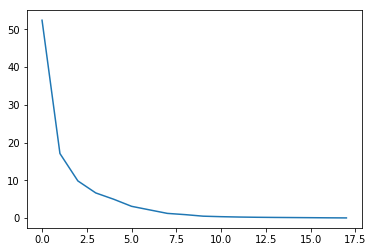

In [570]:
plt.plot(var_exp)

In [571]:
# Visually we can observe that there is a steep drop in variance explained with increase in number of PC's.
# With 7 components we can explain ~96% of variance
# With 10 components we can explain ~98.8% of variance
# With 11 components we can explain ~99% of variance
# We will proceed with 10 components here. But depending on requirement, 95% variation or 7 components will also do good

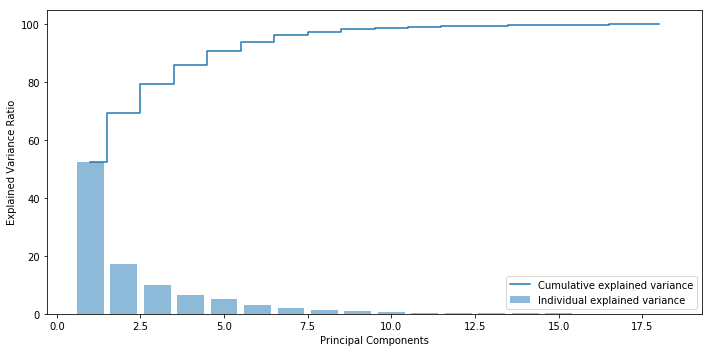

In [572]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

##### Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [573]:
# Using scikit learn to find PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# We are generating only 10 PCA dimensions (dimensionality reduction from 18 to 10)
pca = PCA(n_components=10)

# Fit and Transform using training data, reduce dimensionality to 10
train_reduced = pca.fit_transform(X_train)
train_reduced.transpose()

array([[-2.79476824e-01,  4.69920159e+00, -2.14076185e+00, ...,
         4.87346853e-02, -6.37012022e-01,  3.04822758e+00],
       [-1.70143407e+00, -1.77177899e-01,  1.21483663e+00, ...,
        -1.51944678e+00,  1.74057333e+00,  1.65646246e+00],
       [-4.58464291e-01,  6.62778019e-01,  4.76710609e-01, ...,
        -1.52408291e-01, -2.54471126e-03,  1.44781513e+01],
       ...,
       [ 6.14366325e-01, -5.71036204e-01, -3.74482363e-01, ...,
        -7.20639964e-01,  3.84928150e-01,  1.07994415e+00],
       [ 6.91276401e-01, -1.63258180e-01,  2.37423943e-01, ...,
        -5.38883946e-02, -4.05832558e-02,  4.09451328e-01],
       [ 4.31841536e-01,  3.02345294e-01, -1.27059704e-01, ...,
        -3.67339826e-02,  3.19871392e-01, -4.75153200e-01]])

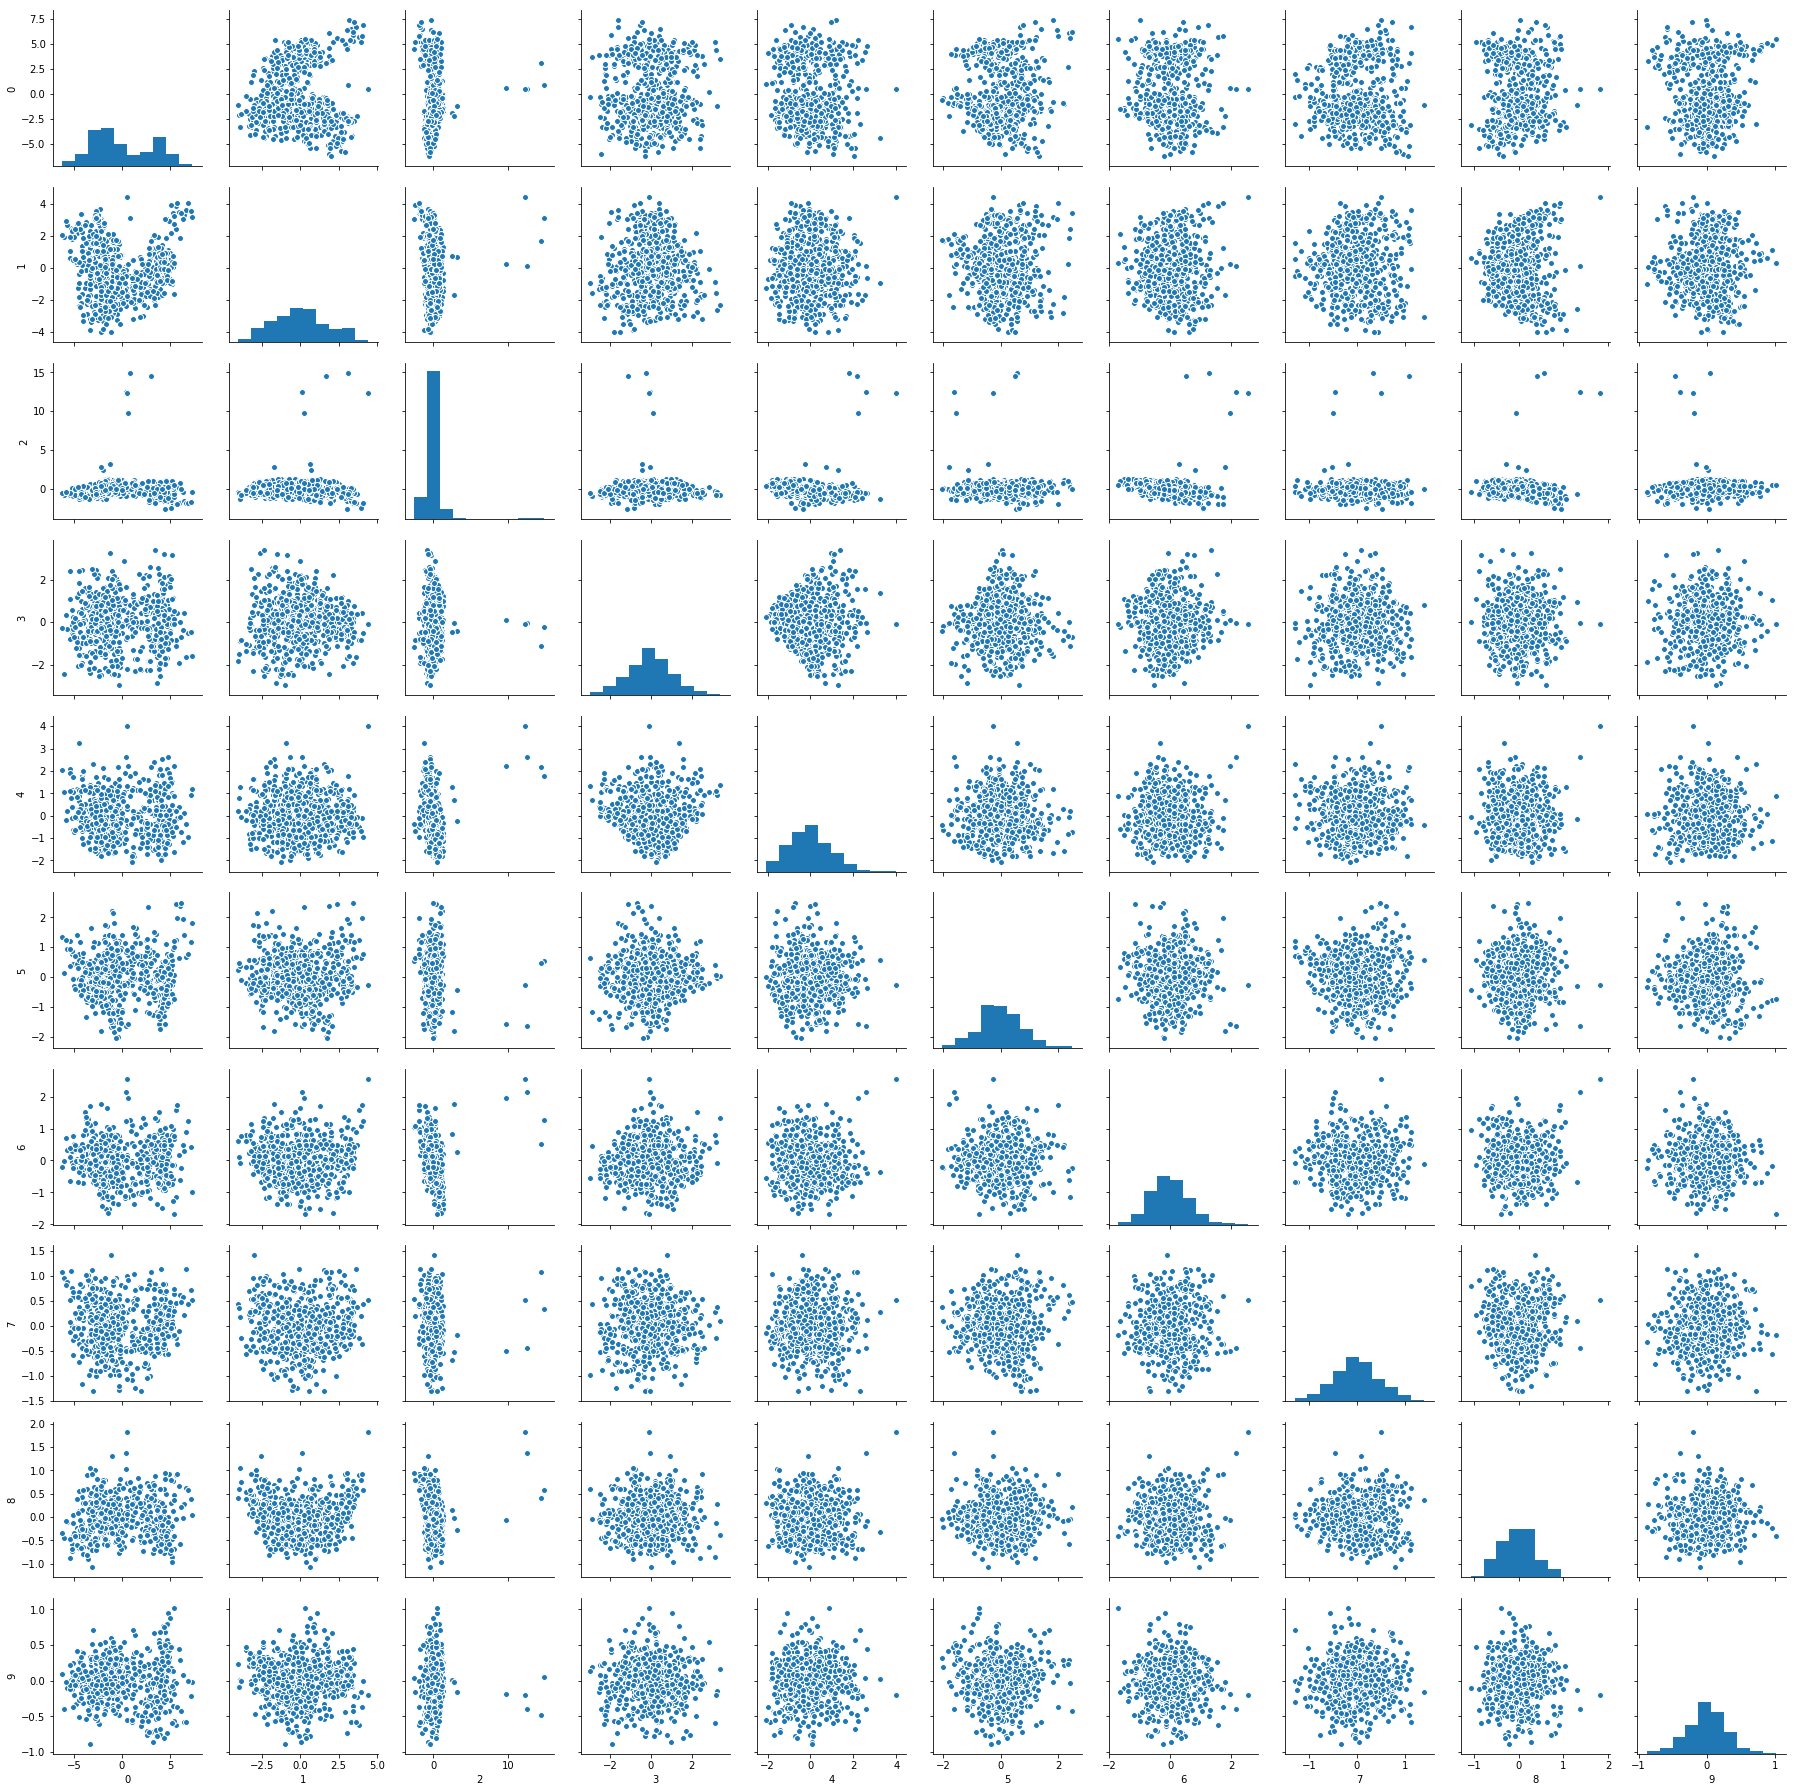

In [582]:
# Plot pair wise plots for the reduced number of dimesions
sns.pairplot(pd.DataFrame(train_reduced))

# We see that all the pair plots have cloud-like forms, 
# which indicates that not only were the dimensions reduced, but the multicollinearity has alsobeen removed.

In [574]:
# Reduce the dimensionality of test data also to 10
test_reduced = pca.transform(X_test)
test_reduced.transpose()

array([[-0.99557267,  4.32519257,  0.40587705, ...,  2.79114105,
        -2.45969757,  1.48782826],
       [ 1.65600903,  2.09628541, -1.61405481, ..., -0.57836209,
         2.31165664, -0.79743209],
       [-0.0323155 , -1.12618979,  0.37595273, ..., -0.02907004,
        -0.26302751,  0.29976001],
       ...,
       [ 0.36638191,  1.11100231,  0.74796093, ...,  0.34444507,
        -0.4044431 , -0.53324792],
       [ 0.0181182 ,  0.30333922, -0.06307952, ..., -0.67409096,
        -0.02123082, -0.07692195],
       [ 0.39439148, -0.28778724,  0.34508955, ..., -0.49121972,
         0.13173092, -0.03055088]])

In [575]:
pca.components_

array([[ 2.74793267e-01,  2.92313354e-01,  3.04295069e-01,
         2.71742950e-01,  8.00813218e-02,  9.23041214e-02,
         3.16306454e-01, -3.13773469e-01,  3.14099981e-01,
         2.81724932e-01,  3.09948641e-01,  3.14505421e-01,
         2.71957737e-01, -2.64726043e-02,  4.25995602e-02,
         5.79421157e-02,  2.89951637e-02,  7.40345653e-02],
       [-1.15343200e-01,  1.23500376e-01, -7.54713887e-02,
        -2.00126301e-01, -1.53830110e-01, -7.85793790e-03,
         5.16912319e-02,  9.96354166e-03,  6.46969273e-02,
         1.17349837e-01,  6.29016595e-02,  5.77066925e-02,
         2.13254191e-01,  4.89214086e-01, -2.05023045e-02,
        -1.25060775e-01, -5.34461667e-01, -5.36133832e-01],
       [-1.33256530e-01, -4.37887968e-03, -5.94326216e-02,
         2.40541108e-01,  6.43479075e-01,  6.00072445e-01,
        -8.91064449e-02,  4.70086785e-02, -1.01429054e-01,
        -1.11715166e-02,  4.39092692e-02, -9.86815721e-02,
        -6.03522641e-03,  2.79564696e-01, -1.47626229e

##### Find correlation between components and features

In [576]:
df_comp = pd.DataFrame(pca.components_, columns=list(X_train))
df_comp.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.274793     0.292313              0.304295      0.271743   
1    -0.115343     0.123500             -0.075471     -0.200126   
2    -0.133257    -0.004379             -0.059433      0.240541   
3     0.093379     0.180778             -0.063809     -0.039233   
4     0.062654    -0.090310              0.052705     -0.040464   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.080081                 0.092304       0.316306   
1             -0.153830                -0.007858       0.051691   
2              0.643479                 0.600072      -0.089106   
3              0.036871                 0.015103      -0.095705   
4             -0.031930                 0.280522      -0.016185   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.313773                0.314100                   0.281725   
1       0.009964                0.064697                   0.117350   
2       0.047009               -0.101429                  -0.011172   
3       0.083865               -0.092671                   0.179738   
4       0.080806                0.000448                  -0.067518   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.309949           0.314505                   0.271958   
1         0.062902           0.057707                   0.213254   
2         0.043909          -0.098682                  -0.006035   
3        -0.123046          -0.088565                   0.188232   
4        -0.005039          -0.021647                  -0.069717   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.026473        0.042600          0.057942   
1                     0.489214       -0.020502         -0.125061   
2                     0.279565       -0.147626         -0.118095   
3                    -0.081849        0.615708         -0.659560   
4                     0.139985        0.711204          0.593734   

   skewness_about.2  hollows_ratio  
0          0.028995       0.074035  
1         -0.534462      -0.536134  
2         -0.009755       0.020555  
3          0.112520       0.049224  
4         -0.095169      -0.010070

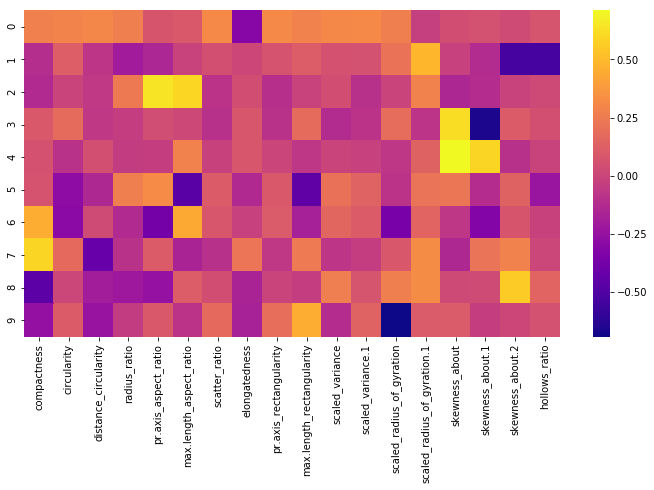

In [577]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [578]:
# This heatmap and the color bar basically represent the correlation between the various features and the principal component itself
# PC# 1 looks highly related to skewness_about.2 & hollows_ratio
# So does PC# 3 & skewness_about.1  
# And PC# 9 & scaled_radius_of_gyration

##### Test the accuracy of the model after dimensionality reduction

In [579]:
# Create logistic regression object 
reg = LogisticRegression() 
   
# Train the model using the training set with reduced dimensions 
reg.fit(train_reduced, y_train) 
  
# Making predictions on the testing set 
y_pred = reg.predict(test_reduced) 

# Comparing actual response values (y_test) with predicted response values (y_pred) 
LR_acc = round(accuracy_score(y_test, y_pred), 2)*100
print("Logistic Regression model accuracy(in %):", LR_acc)

Logistic Regression model accuracy(in %): 87.0


In [580]:
# Conclusion
# As we can see, we were able to reduce complexity by reducing dimensions from 18 to 10, however had to compromise in accuracy.